<a href="https://colab.research.google.com/github/awallexy3216/Coal-Mining/blob/main/hamoye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
    Running setup.py install for fbprophet ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-6nxwmazo/fbprophet_f7a50df5101a4a488d3e1889e4398955/setup.py'"'"'; __file__='"'"'/tmp/pip-install-6nxwmazo/fbprophet_f7a50df5101a4a488d3e1889e4398955/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-a0w7kjg7/install-record.txt --single-version-externally-managed --compile --install-hea

In [ ]:
!pip install pystan~=2.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 112 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [ ]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.3 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638544 sha256=e8cdd3934992a12da46c4bd8c44f7bd6ee3a8d2656ff6ef263d99442e87b4f24
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1 requires cmdstanpy>=1.0.1, but you have cmdstanpy 0.9.5 which is incompatible.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.express as px
import plotly.graph_objects as go
from fbprophet import Prophet
from fbprophet.plot import plot_plotly


In [ ]:
from google.colab import files
upload=files.upload()

Saving Time_series_analysis_and_forecast_DATASET.csv to Time_series_analysis_and_forecast_DATASET.csv


In [35]:
dat = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

In [37]:
dat

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [38]:
dat.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [39]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [40]:
df=dat[['FullDate', 'ElecPrice']]

In [ ]:
df.head(2)

,FullDate,ElecPrice
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   ElecPrice  92016 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


In [ ]:
df['FullDate']=pd.to_datetime(df['FullDate'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 MB


In [ ]:
df = df.rename(columns={'FullDate':'ds', 'ElecPrice':'y'})

In [ ]:
df.head(2)

,ds,y
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635


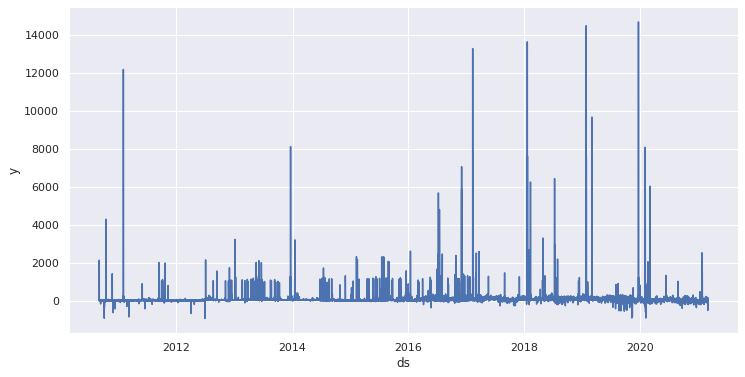

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='ds', y='y')
plt.show()

In [ ]:
train = df[:2757]
test = df[2757:]

In [ ]:
model = Prophet()

In [ ]:
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future_dates =model.make_future_dataframe(periods=12, freq='MS')

In [63]:
test_fitt = test[['ds','SysLoad','Tmax', 'GasPrice']]

KeyError: ignored

In [ ]:
future_dates.head()

,ds
0,2010-09-01 00:00:00
1,2010-09-01 01:00:00
2,2010-09-01 02:00:00
3,2010-09-01 03:00:00
4,2010-09-01 04:00:00


In [ ]:
forecast = model.predict(future_dates)
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower', 'trend_upper']].head(4)

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01 00:00:00,44.777554,-93.956529,174.962159,37.069420,37.069420,37.069420
1,2010-09-01 01:00:00,43.733402,-89.316285,175.411554,37.021443,37.021443,37.021443
2,2010-09-01 02:00:00,40.148666,-86.160999,173.772528,36.973466,36.973466,36.973466
3,2010-09-01 03:00:00,36.121575,-87.030697,172.008803,36.925489,36.925489,36.925489


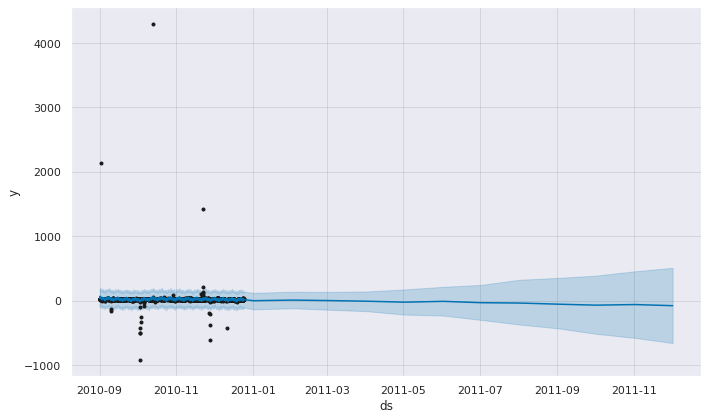

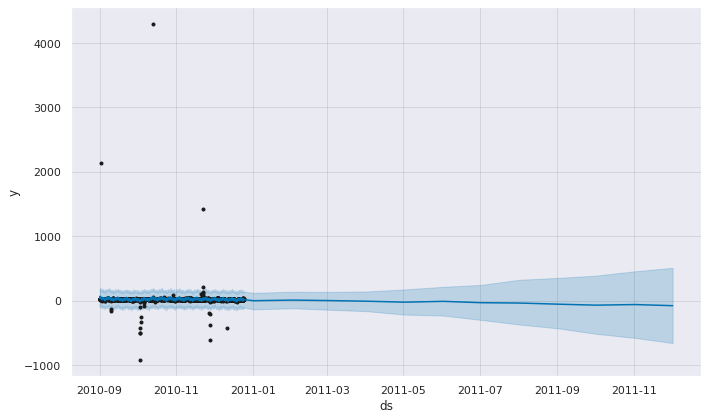

In [ ]:
model.plot(forecast)

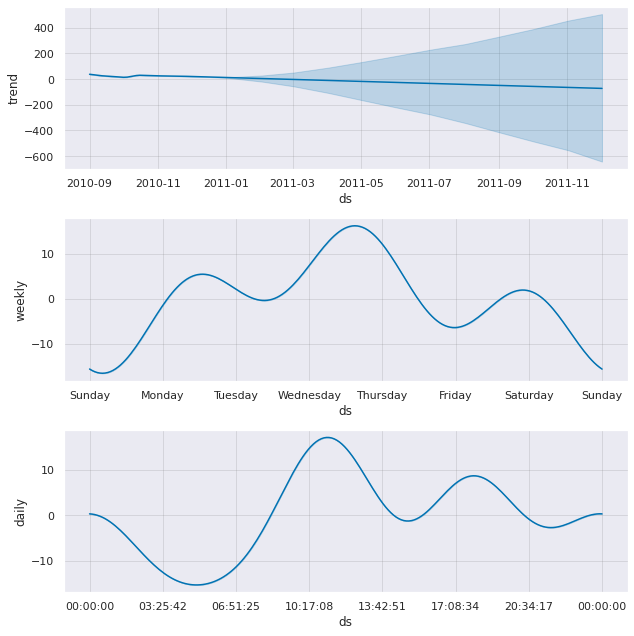

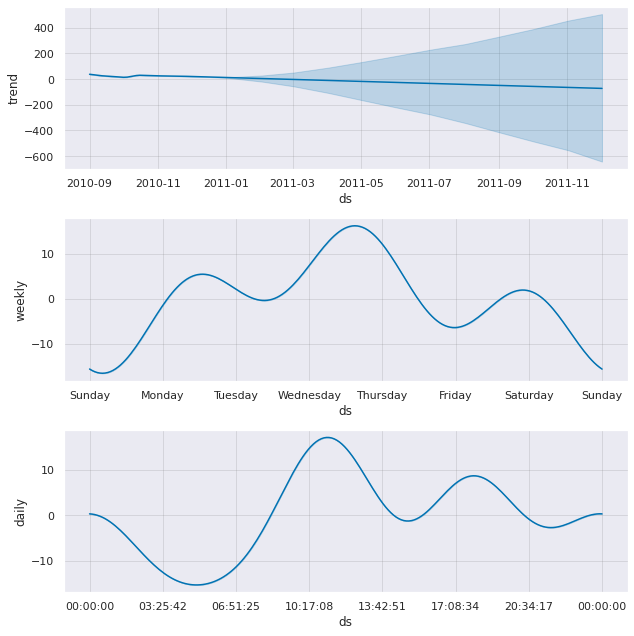

In [ ]:
model.plot_components(forecast)

In [41]:
dat

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [42]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [44]:
dat['FullDate']=pd.to_datetime(dat['FullDate'])

In [45]:
dat.head(2)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635


In [46]:
dat = dat.rename(columns={'FullDate':'ds', 'ElecPrice':'y'})

In [47]:
dat.head(2)

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635


In [48]:
train_new = dat[:2757]
test_new = dat[2757:]

In [50]:
train_new.head(2)
print(train_new.shape)

(2757, 5)


In [51]:
model1 = Prophet()
model1.add_regressor('SysLoad', standardize=False)
model1.add_regressor('Tmax', standardize=False)
model1.add_regressor('GasPrice', standardize=False)
model1.fit(train_new)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [56]:
test_real = test_new[['ds','SysLoad','Tmax', 'GasPrice']]

In [57]:
test_real.head(2)

,ds,SysLoad,Tmax,GasPrice
2757,2010-12-24 21:00:00,1513.57905,33.3,3.0988
2758,2010-12-24 22:00:00,1341.05455,33.3,3.0988


In [58]:
forecast1 = model1.predict(test_real)
forecast1 = forecast1[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower', 'trend_upper']]

In [59]:
forecast1.head()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-12-24 21:00:00,18.069996,-112.372340,144.599320,19.212909,19.212909,19.212909
1,2010-12-24 22:00:00,15.603257,-104.769632,145.137464,19.221660,19.221660,19.221660
2,2010-12-24 23:00:00,14.140263,-102.572798,132.351009,19.230410,19.230410,19.230410
3,2010-12-25 00:00:00,17.997213,-100.251239,142.799822,19.239160,19.239160,19.239160
4,2010-12-25 01:00:00,18.425398,-105.368510,152.312033,19.247911,19.247911,19.247911


In [60]:
test_new.head()

,ds,Tmax,SysLoad,GasPrice,y
2757,2010-12-24 21:00:00,33.3,1513.57905,3.0988,24.870
2758,2010-12-24 22:00:00,33.3,1341.05455,3.0988,22.820
2759,2010-12-24 23:00:00,33.3,1135.43285,3.0988,21.185
2760,2010-12-25 00:00:00,31.7,1169.16690,3.0988,20.120
2761,2010-12-25 01:00:00,31.7,1209.20920,3.0988,18.065


In [61]:
dat.head(2)

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635


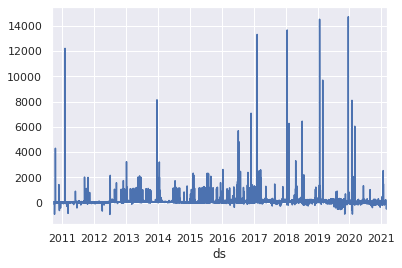

In [62]:
dat.groupby('ds').sum()['y'].plot()

In [74]:
from statsmodels.tsa.stattools import adfuller
def stationarity(col):
    result = adfuller(col.dropna())
    print('Test statistics:', result[0])
    print('p-value:', result[1])
    print('number of lag:', result[2])
    if result[1]<0.05:
        print('Stationary')
    else:
        print('non-stationary')

In [75]:
df_p = dat.groupby('ds').sum()['SysLoad']

In [76]:
stationarity(df_p)

Test statistics: -18.17067542641451
p-value: 2.4474966090684217e-30
number of lag: 67
Stationary


In [64]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [69]:
map = mape(test_new, forecast1)

ValueError: ignored

In [66]:
from sklearn.metrics import mean_squared_error
from math import sqrt


In [73]:
rmse = sqrt(mean_squared_error(test_new, forecast1))

TypeError: ignored

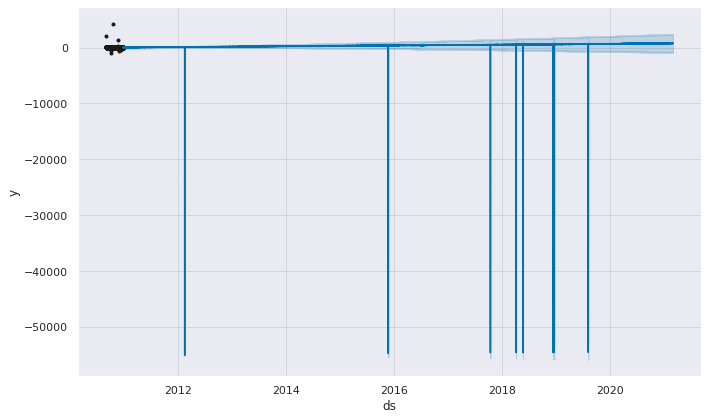

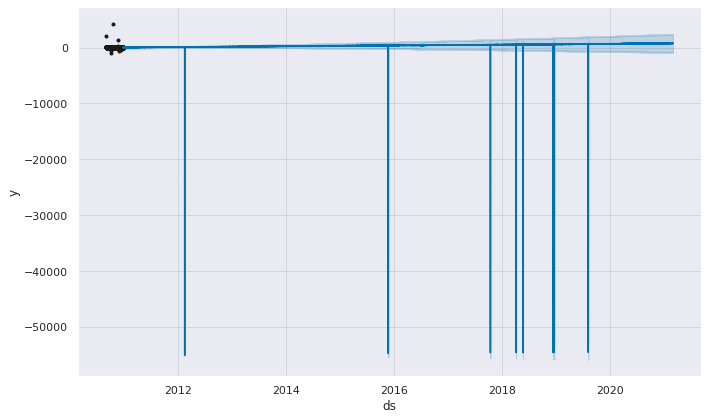

In [71]:
model1.plot(forecast1)

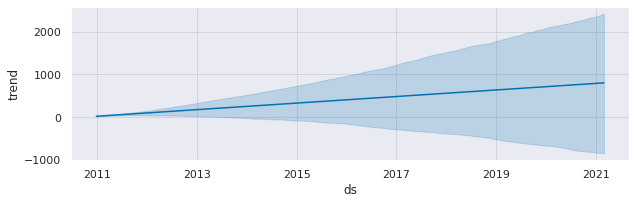

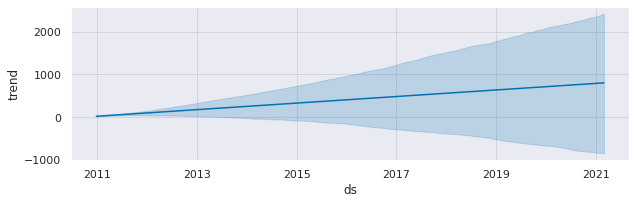

In [72]:
model1.plot_components(forecast1)